In [ ]:
# Dự đoán khả năng trả nợ, giải pháp trước khi đưa ra quyết định có cho khách vay hay không

In [ ]:
# Mount GDrive to load Data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Cài đặt thư viện
!pip install xgboost
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Thêm thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [ ]:
# # Đọc file từ dataset
# df_loans = pd.read_csv('/content/drive/MyDrive/Loan-Repayment-Prediction-DACN/dataset/loan_data.csv')
# df_loans.info()

In [ ]:
# Đọc file từ dataset
df_loans = pd.read_csv('/content/drive/MyDrive/Loan-Repayment-Prediction-DACN/dataset/loanRP_data.csv')
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


In [ ]:
# Kiểm tra dòng đầu tiên
df_loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [ ]:
# EDA dữ liệu kiểm tra số lượng bản ghi

In [ ]:
df_loans.count()


credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [ ]:
# Kiểm tra NaN
df_loans[df_loans.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


In [ ]:
# Drop NaN
df_loans.dropna(inplace= True)

In [ ]:
# Kiểm tra NaN
df_loans[df_loans.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid


1    26775
0    10145
Name: not_fully_paid, dtype: int64


<Axes: >

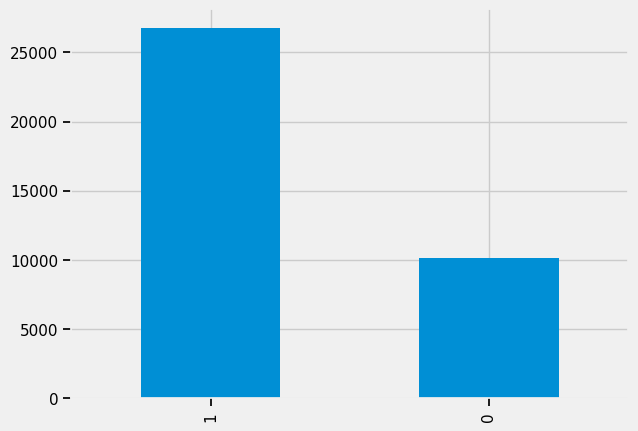

In [ ]:
# Kiểm tra thống kê khả năng hoàn trả
  # 0: Fail
  # 1: True
print(df_loans["not_fully_paid"].value_counts())
df_loans["not_fully_paid"].value_counts().plot(kind="bar")
# imbalanced data

--------------------------

**Pre-Processing Data**

In [ ]:
# Tìm các field là Oject/ String => 1 Purpose row => handle OneHot
object_cols = [f for f in df_loans.columns if df_loans[f].dtype =="O"]
print(object_cols)

['purpose']


In [ ]:
# Kiểm tra "purpose"
df_loans['purpose'].value_counts()

debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

In [ ]:
# Kiểm tra
def process_purpose(x):
  if x == "debt_consolidation":
    return 1
  else:
    return 0

df_loans['purpose_int'] = df_loans['purpose'].apply(process_purpose)

In [ ]:
# Kiểm tra "purpose"
df_loans['purpose_int'].value_counts()

1    19516
0    17404
Name: purpose_int, dtype: int64

In [ ]:
# Xử lý Drop purpose
df_loans.drop(columns=["purpose"], inplace=True)

In [ ]:
# View
df_loans

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,1,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,1,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,1,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [ ]:
# Kiểm tra credit_policy
df_loans["credit_policy"].value_counts()

1    36920
Name: credit_policy, dtype: int64

In [ ]:
# Drop credit_policy
df_loans.drop(columns=["credit_policy"], inplace=True)
df_loans

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [ ]:
# Kiểm tra Correlation
corr = df_loans.corr()
corr.style.background_gradient(cmap='coolwarm')

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
int_rate,1.000000,0.042739,-0.055919,0.116065,-0.456244,0.086726,0.021824,0.133468,-0.003504,0.172759,0.046075,-0.036599,0.097478
installment,0.042739,1.000000,0.227242,0.084286,0.022387,-0.125390,0.170643,0.028539,0.226005,0.046695,-0.049956,-0.013016,0.140044
log_annual_inc,-0.055919,0.227242,1.000000,-0.121779,0.020853,-0.119594,0.151355,0.044720,0.177392,0.029868,-0.034424,-0.037026,-0.002927
dti,0.116065,0.084286,-0.121779,1.000000,-0.013244,-0.044598,0.077765,0.000342,0.081434,0.032497,-0.010775,-0.031361,0.054696
fico,-0.456244,0.022387,0.020853,-0.013244,1.000000,-0.120728,-0.021722,-0.188516,-0.065700,-0.307689,-0.191167,-0.027124,-0.024893
days_with_cr_line,0.086726,-0.125390,-0.119594,-0.044598,-0.120728,1.000000,-0.066180,-0.068710,-0.187349,-0.052515,-0.006409,-0.038029,-0.006357
revol_bal,0.021824,0.170643,0.151355,0.077765,-0.021722,-0.066180,1.000000,0.128898,-0.203446,-0.146972,-0.067585,-0.356469,0.029699
revol_util,0.133468,0.028539,0.044720,0.000342,-0.188516,-0.068710,0.128898,1.000000,-0.061745,-0.014098,-0.052424,-0.086816,0.004182
inq_last_6mths,-0.003504,0.226005,0.177392,0.081434,-0.065700,-0.187349,-0.203446,-0.061745,1.000000,0.220876,-0.056046,0.219629,-0.007000
delinq_2yrs,0.172759,0.046695,0.029868,0.032497,-0.307689,-0.052515,-0.146972,-0.014098,0.220876,1.000000,-0.030163,0.135084,0.007397


In [ ]:
# Scale dữ liệu
input_fields = df_loans.drop(columns=["not_fully_paid"]).columns.values
X = df_loans[input_fields]
Y = df_loans["not_fully_paid"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[input_fields])
X[input_fields] = scaler.transform(X[input_fields])

<ipython-input-22-d2b9954e371b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[input_fields] = scaler.transform(X[input_fields])


In [ ]:
# View X
X.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0


In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
predictors = df_loans.drop(columns=["not_fully_paid"]).columns.values

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
<ipython-input-26-1ccf7288d21c>:16: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


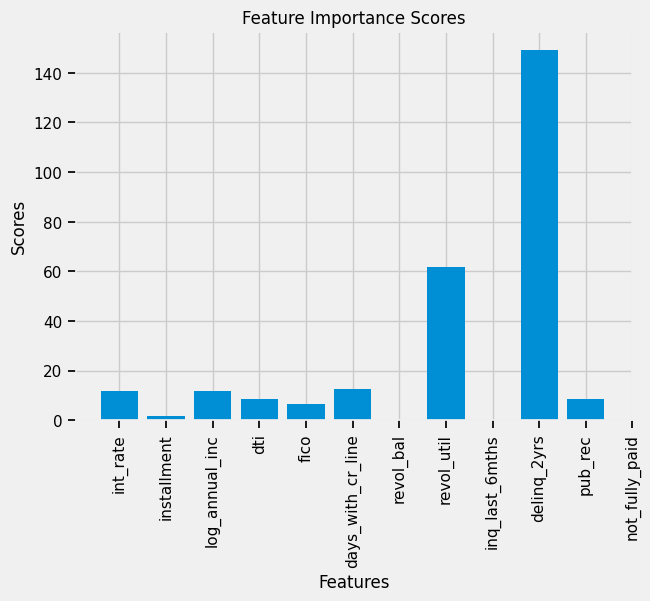

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Đặc trưng và biến mục tiêu
predictors = df_loans.columns[:-1]  # Giả sử df_loans là DataFrame chứa dữ liệu
target = "not_fully_paid"

# Tạo một đối tượng SelectKBest
selector = SelectKBest(f_classif, k=5)

# Huấn luyện Selector
X_selected = selector.fit_transform(df_loans[predictors], df_loans[target])

# Lấy raw p-values và chuyển đổi thành điểm số
scores = -np.log10(selector.pvalues_)

# Biểu đồ điểm số của các đặc trưng
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Feature Importance Scores")
plt.show()

In [ ]:
X.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0


---------------------------

In [ ]:
# Split dữ liệu train, test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Hiển thị thử X_train
X_train.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
24635,0.729412,0.505840,0.013441,0.017107,0.053763,0.697771,0.000000,0.086957,0.018102,0.051333,0.2,1.0
22808,0.266667,0.386884,0.009247,0.003403,0.403226,0.705218,0.000002,0.000000,0.017255,0.043933,0.0,0.0
16378,0.400000,0.236607,0.004839,0.017828,0.080645,0.848958,0.000000,0.000000,0.012404,0.046133,0.0,1.0
25975,0.266667,0.144526,0.005376,0.016697,0.188172,0.832603,0.000006,0.000000,0.014905,0.028933,0.0,0.0
16426,0.086275,0.246575,0.017742,0.004795,0.456989,0.813376,0.000000,0.000000,0.005965,0.011467,0.2,0.0


### Train Model - XGBoost (nonUpsampling)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

In [ ]:
# Upsampling
# sm = SMOTE(k_neighbors=5)
# X_train_resample, Y_train_resample = sm.fit_resample(X_train,Y_train)

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, Y_train)

Y_pred = model_xgb.predict(X_test)

In [ ]:
# In kết quả
print(classification_report( Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.83      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.83      0.83      7384



0.77721


<ipython-input-33-3dee45abb651>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


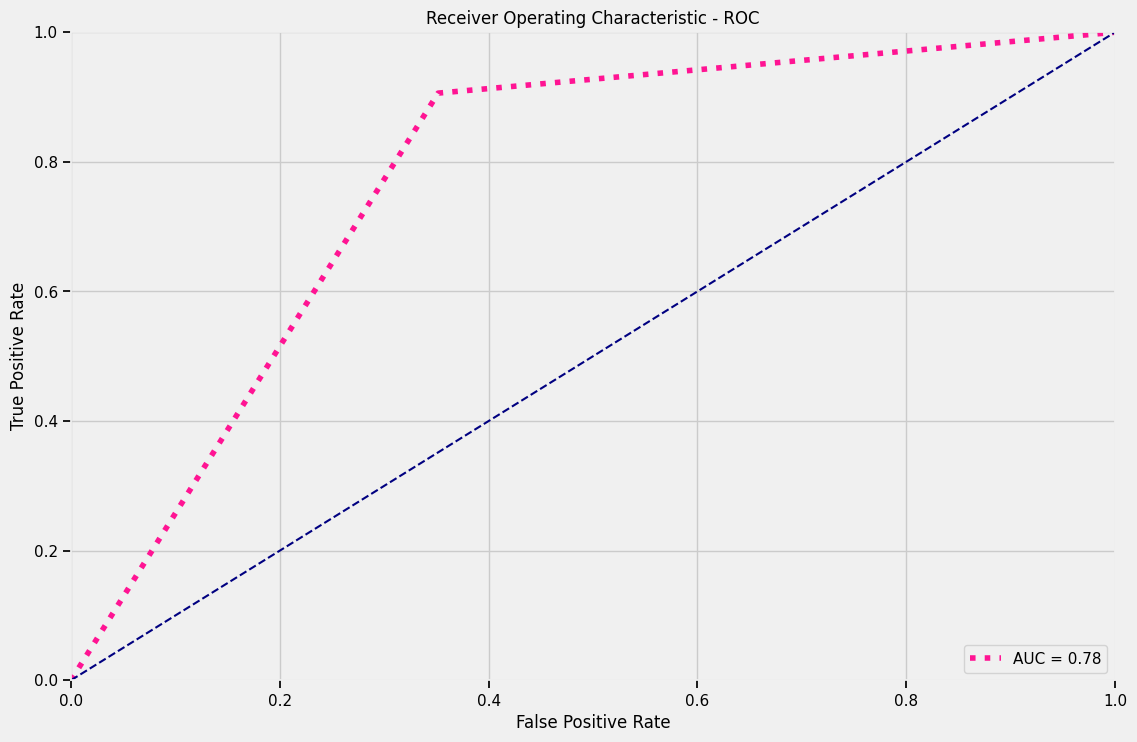

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(Y_test, Y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Grid search XGBoost
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
%pip install scipy

In [ ]:
!python -m pip install --upgrade pip
!pip install -U scikit-learn

from sklearn.model_selection import GridSearchCV


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

-------------------------

**Create the Model**

In [ ]:
!pip install --user tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
pwd

'/content'

In [ ]:
from datetime import datetime

In [ ]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2023-12-10--1440'

In [ ]:
log_directory = 'logs\\fit'
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [ ]:
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
X_train.shape

(29536, 12)

In [ ]:
# Tham số truyền vào fnc fit
model.fit(x=X_train,y=Y_train,epochs=500,batch_size=256,validation_data=(X_test,Y_test),verbose=1,callbacks=[early_stop,board])

Epoch 1/500
116/116 [==============================] - 4s 13ms/step - loss: 0.6136 - val_loss: 0.5933
Epoch 2/500
116/116 [==============================] - 2s 16ms/step - loss: 0.5753 - val_loss: 0.5303
Epoch 3/500
116/116 [==============================] - 2s 17ms/step - loss: 0.5212 - val_loss: 0.4752
Epoch 4/500
116/116 [==============================] - 3s 30ms/step - loss: 0.4894 - val_loss: 0.4534
Epoch 5/500
116/116 [==============================] - 3s 28ms/step - loss: 0.4690 - val_loss: 0.4457
Epoch 6/500
116/116 [==============================] - 4s 32ms/step - loss: 0.4603 - val_loss: 0.4547
Epoch 7/500
116/116 [==============================] - 2s 19ms/step - loss: 0.4507 - val_loss: 0.4295
Epoch 8/500
116/116 [==============================] - 2s 19ms/step - loss: 0.4433 - val_loss: 0.4226
Epoch 9/500
116/116 [==============================] - 2s 21ms/step - loss: 0.4401 - val_loss: 0.4267
Epoch 10/500
116/116 [==============================] - 2s 20ms/step - loss: 0.439

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Lưu model
model.save('LoansRP_DACN.h5')

-----------------------------------------------

**Evaluating Model Performance**

In [ ]:
losses=pd.DataFrame(model.history.history)

<Axes: >

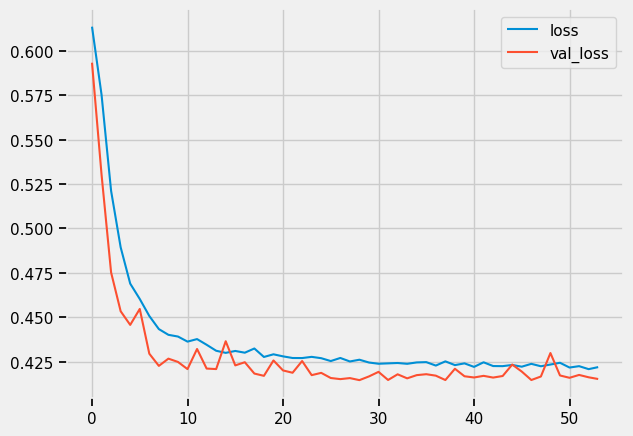

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

231/231 [==============================] - 1s 2ms/step


In [ ]:
# In kết quả
print(classification_report( Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.83      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.83      0.83      7384



Test

In [ ]:
import random
random.seed(101)

In [ ]:
random_ind = random.randint(0, len(df_loans) - 1)

In [ ]:
print(df_loans.columns)


Index(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'not_fully_paid', 'purpose_int'],
      dtype='object')
